In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("HousingData.csv")

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
ex_missing_values = data.isnull().sum()
print(ex_missing_values)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [5]:
data = data.fillna(data.mean())

In [6]:
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
import matplotlib.pyplot as plt

In [8]:
x = data.drop("MEDV",axis = 1)
y = data.loc[:, "MEDV"]
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.3)

In [9]:
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha =0.5)

In [10]:
linear_reg.fit(x_train,y_train)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5)

In [11]:
linear_pred = linear_reg.predict(x_test)
ridge_pred = ridge_reg.predict(x_test)

In [12]:
linear_mse = mean_squared_error(y_test,linear_pred)
ridge_mse = mean_squared_error(y_test,ridge_pred)

In [13]:
print(f"MSE without Ridge: {linear_mse}")
print(f"MSE without Ridge: {ridge_mse}")

MSE without Ridge: 16.944143366704907
MSE without Ridge: 16.567369295433444


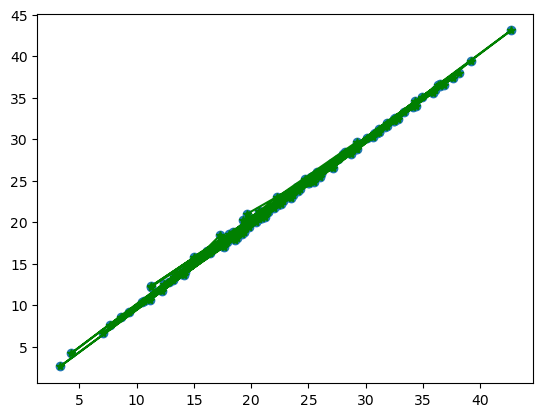

In [17]:
plt.scatter(linear_pred,ridge_pred)
plt.plot(linear_pred,ridge_pred,"g-*")